In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [54]:
data=pd.read_csv(r"D:\Project\Churn modeling\Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

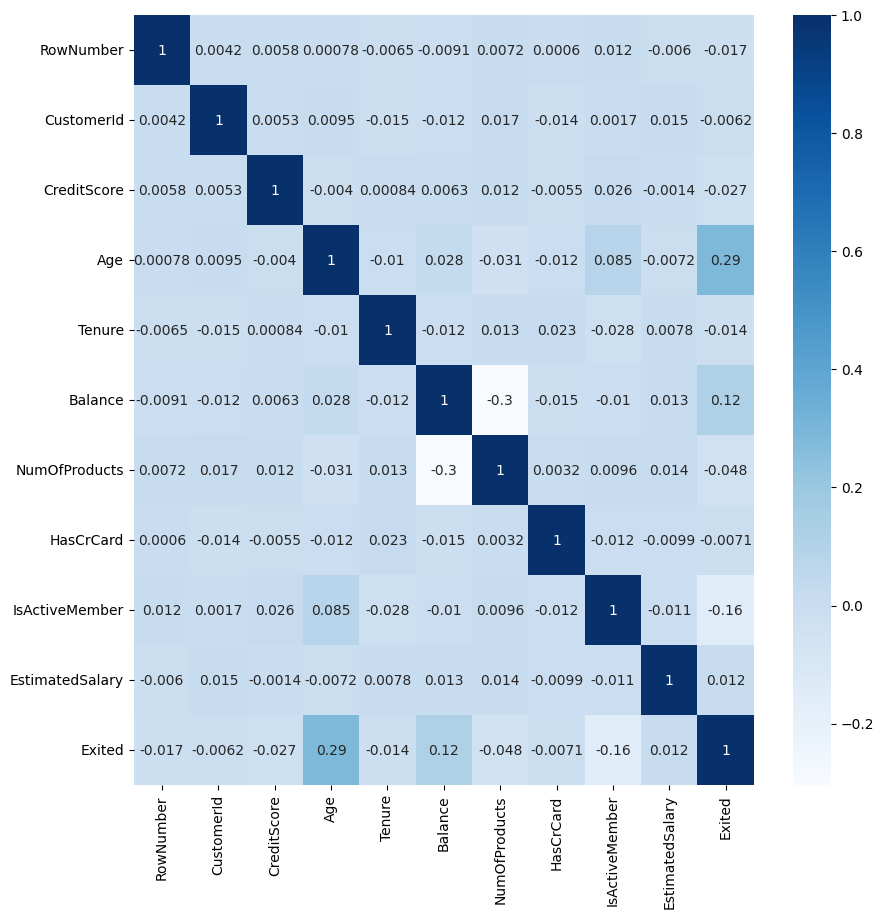

In [55]:
# Checking the correlation between dependednt and independent featurs.cor_Mtx=data.select_dtypes(include='number').corr()
cor_Mtx=data.select_dtypes(include='number').corr()
#top_corr_feature=cor_Mtx.index

plt.figure(figsize=(10,10))
sns.heatmap(cor_Mtx,annot=True,cmap="Blues")

In [56]:
x=data.iloc[:,3:-1]
y=data.iloc[:,-1:]
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [57]:
# Handel Catagorical values
Geography=pd.get_dummies(x['Geography'],drop_first=True).astype(int)
Gender=pd.get_dummies(x['Gender'],drop_first=True).astype(int)
Gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [58]:
# Adding the columns to main data
x=pd.concat([x,Gender],axis=1)
x=pd.concat([x,Geography],axis=1)
x=x.drop(columns=['Geography','Gender'])
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0


In [61]:
import xgboost
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


In [79]:
# creting Hyper Paramerters
params_xg={
    'learning_rate':[.05,.10,.15,.20,.25,.30],
    'max_depth':[3,4,5,6,7,8,10,12,15,20],
    'min_child_weight':[1,3,5,7],
    'gamma':[0,.1,.2,.3,.4],
    'colsample_bytree':[0.3,.4,.5,.7]
}
from scipy.stats import randint
param_RF = {
    'n_estimators': randint(100, 500),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True, False]
}

In [80]:
model1=xgboost.XGBClassifier()
model2=RandomForestClassifier()

In [81]:
random_search=RandomizedSearchCV(model1,param_distributions=params_xg,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_searchRF=RandomizedSearchCV(model2,param_distributions=param_RF,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [82]:
random_search.fit(x,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 12,
                                                      15, 20],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [83]:
random_searchRF.fit(x,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\himan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000273ADE4ED50>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000273ADE2D040>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000273ADE84DA0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000273ADECFF80>},
                   scoring='roc_auc', verbose=3)

In [84]:
random_search.best_estimator_,random_searchRF.best_estimator_

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.7, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.3, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.2, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=3, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=6,
                        min_samples_split=3, n_estimators=355))

In [87]:
random_search.best_params_,random_searchRF.best_params_

({'min_child_weight': 3,
  'max_depth': 3,
  'learning_rate': 0.2,
  'gamma': 0.3,
  'colsample_bytree': 0.7},
 {'bootstrap': True,
  'max_depth': 20,
  'max_features': 'log2',
  'min_samples_leaf': 6,
  'min_samples_split': 3,
  'n_estimators': 355})

In [89]:
xg1=xgboost.XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.7, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.3, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.2, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=3,monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None,)
RF=RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=6,
                        min_samples_split=3, n_estimators=355)

In [90]:
from sklearn.model_selection import cross_val_score
scoreXG=cross_val_score(xg1,x,y,cv=10)
scoreRF=cross_val_score(RF,x,y,cv=10)


C:\Users\himan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\himan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\himan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

In [91]:
scoreXG,

array([0.873, 0.862, 0.873, 0.872, 0.861, 0.852, 0.869, 0.873, 0.856,
       0.852])

In [92]:
scoreRF

array([0.869, 0.855, 0.876, 0.871, 0.866, 0.852, 0.865, 0.873, 0.859,
       0.861])

In [93]:
np.mean(scoreXG),np.mean(scoreRF)

(np.float64(0.8643000000000001), np.float64(0.8647))